В мире данных время играет ключевую роль. Финансовые рынки, погодные условия,
спрос на товары и даже сердечный ритм — всё это примеры временных рядов, где
прошлые значения оказывают влияние на будущее. Анализ таких данных требует особого
подхода, отличного от работы со статичными наборами.

Прогнозирование временных рядов — одна из самых сложных, но и самых
полезных задач в машинном обучении. Здесь недостаточно просто найти закономерности,
как в классическом анализе данных. Нужно учитывать последовательность событий,
сезонные колебания, долгосрочные тренды и случайные выбросы. Именно поэтому
исследователи разработали целый арсенал инструментов: от математических моделей,
основанных на статистике, до мощных нейросетевых решений, способных находить
скрытые зависимости в больших массивах информации.

Эта глава посвящена тому, как научиться видеть время не просто как параметр, а
как источник информации, раскрывающий поведение системы. Мы рассмотрим методы
анализа, предсказания и интерпретации временных данных, чтобы извлекать из них
максимум пользы.#%% md

Основы работы с временными рядами

Временной ряд — это последовательность наблюдений, упорядоченная по времени.
В отличие от обычных табличных данных, в которых порядок строк не всегда важен, здесь
каждая точка привязана к конкретному моменту, а изменение значений во времени несет в
себе ключевую информацию.

Во многих реальных процессах будущее зависит от прошлого. Например, спрос на
товары в интернет-магазине сегодня во многом определяется количеством продаж вчера,
сезонностью, выходными и даже праздниками. Если просто взять данные о продажах без
учета времени и применить стандартные алгоритмы, можно упустить важные
закономерности.

Пример временного ряда

Рассмотрим магазин, продающий зонты. Владелец хочет понять, как изменяется
спрос на зонты в течение года. Он собирает данные о количестве проданных зонтов
каждый день и строит график.

На этом графике можно заметить несколько вещей:
- Сезонность: летом спрос падает, осенью и весной — растет.
- Тренд: за несколько лет продажи зонтов постепенно увеличиваются, возможно, из-за
роста числа покупателей.
- Шумы и аномалии: в некоторые дни бывают резкие всплески спроса, например, во время
проливных дождей.

Рассмотрим код для моделирования временного ряда с продажами зонтов,
включающего тренд, сезонность и шум. Мы создадим данные на основе синтетической
модели и визуализируем их.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Генерация временного ряда на 2 года (730 дней)
np.random.seed(42)
days = np.arange(730) # Дни с 0 до 729
# Тренд: постепенный рост продаж (например, магазин становится популярнее)
trend = 0.05 * days
# Сезонность: больше продаж осенью и весной, меньше летом (синусоида)
seasonality = 10 * np.sin(2 * np.pi * days / 365)
# Случайный шум: неожиданные изменения спроса
noise = np.random.normal(scale=5, size=len(days))
# Аномалии: резкий всплеск продаж в дождливые дни (например, на 100-й и 500-й день)
anomalies = np.zeros_like(days, dtype=float)
anomalies[[100, 500]] = 30 # В эти дни продажи резко подскочили
# Итоговые данные по продажам
sales = 50 + trend + seasonality + noise + anomalies # Базовый уровень продаж - 50 зонтов в день
# Создадим DataFrame
dates = pd.date_range(start="2023-01-01", periods=len(days), freq="D")
df = pd.DataFrame({"Date": dates, "Umbrella Sales": sales})

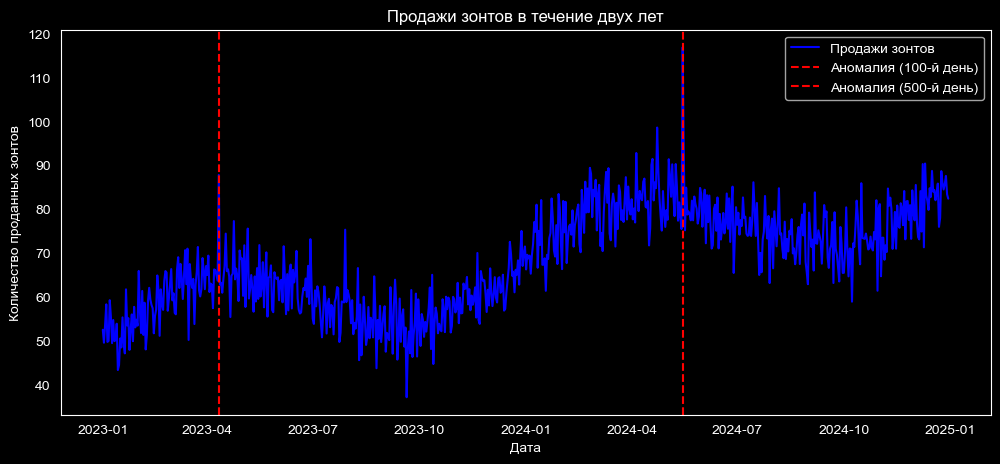

In [5]:
# Визуализация временного ряда
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Umbrella Sales"], label="Продажи зонтов", color="blue")
plt.axvline(df["Date"][100], color="red", linestyle="--", label="Аномалия (100-й день)")
plt.axvline(df["Date"][500], color="red", linestyle="--", label="Аномалия (500-й день)")
plt.xlabel("Дата")
plt.ylabel("Количество проданных зонтов")
plt.title("Продажи зонтов в течение двух лет")
plt.legend()
plt.grid()
plt.show()

Что делает этот код?
1. Генерирует данные о продажах зонтов за 2 года, добавляя:

Трен (постепенный рост спроса).

Сезонность (изменение спроса по временам года).

Шум (случайные колебания).

Аномалии (резкий рост продаж в дождливые дни).

2. Создаёт временной ряд в виде DataFrame с датами и количеством проданных зонтов.
3. Строит график, показывающий общий тренд, сезонные колебания и резкие всплески.

Основные компоненты временного ряда

1. Тренд – это долгосрочное изменение значений. Если продажи зонтов в среднем
увеличиваются из года в год, это восходящий тренд.
2. Сезонность – повторяющиеся изменения в определенные периоды (например, рост
продаж в дождливый сезон).
3. Циклы – более долгосрочные колебания, связанные с экономическими или социальными
процессами.
4. Шум – случайные колебания, которые не имеют четкой закономерности.

Как анализировать временные ряды?

Анализ начинается с визуализации данных. Построив график, можно увидеть
основные закономерности: есть ли тренд, как выражена сезонность, присутствуют ли
выбросы. Затем можно применять различные методы для выявления зависимостей и
прогнозирования будущих значений.

Например, если владелец магазина знает, что осенью продажи всегда растут, он
может заранее увеличить запасы зонтов. А если анализ покажет, что резкие всплески
спроса связаны с прогнозом погоды, можно настроить динамическое ценообразование:
повышать цены в дождливые дни и снижать в сухие.

Временные ряды встречаются повсюду: в финансах, климатологии, маркетинге,
биологии и даже в социальных сетях. Их анализ позволяет не только понимать прошлое,
но и предсказывать будущее, что делает их одним из самых важных инструментов в работе
с данными.